<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-17 08:00:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  56.6MB/s    in 2.7s    

2025-11-17 08:01:02 (56.6 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 174.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 157.1 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [35]:
#execute SQL query to retrive data
query = """
SELECT CompTotal FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)


In [36]:
#check unique value
print('\nThere are', df['CompTotal'].nunique(), 'unique CompTotal values in the survey:')
print(df['CompTotal'].value_counts())  


There are 3337 unique CompTotal values in the survey:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64


In [37]:
#missing value in 'CompTotal' column
df['CompTotal'].isna().sum()

np.int64(31697)

In [38]:
max_CompTotal = df['CompTotal'].max()
print(max_CompTotal) 

1.0000000000000002e+150


In [31]:
# Count the occurrences of 'A' in the 'Category' column
count_of_A = df['CompTotal'].value_counts()[1111111111111111.0]
print(f"The value '1111111111111111.0' appears {count_of_A} times.")

The value '1111111111111111.0' appears 1 times.


In [32]:
df['CompTotal'] = df['CompTotal'].replace({1111111111111111.0: 100000.0})

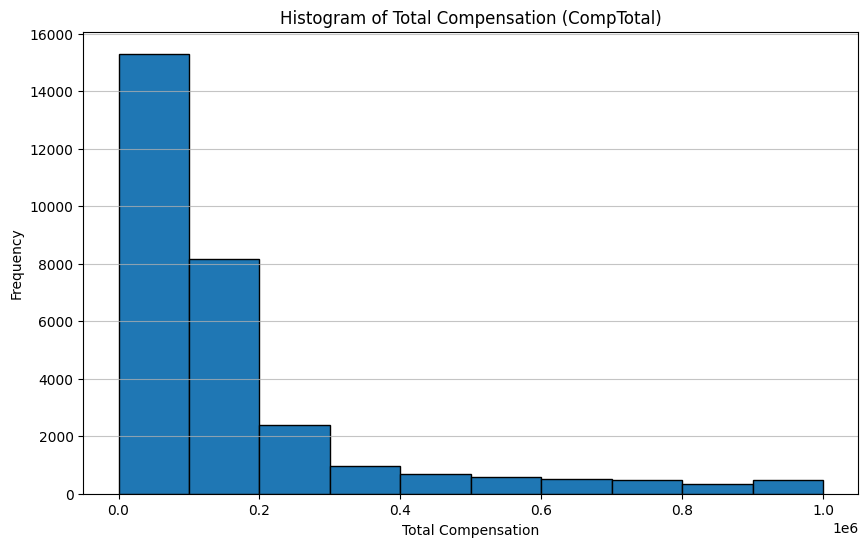

In [14]:
#plot the histogram
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
plt.figure(figsize=(10, 6))
df['CompTotal'].plot(kind='hist', bins=bins, edgecolor='black') # Adjust bins as needed
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [39]:
!pip install seaborn
import seaborn as sns

#execute SQL query to retrive data
query = """
SELECT Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

#check unique value
print('There are', df['Age'].nunique(), 'unique Age in the survey:')
print(df['Age'].value_counts())


There are 8 unique Age in the survey:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


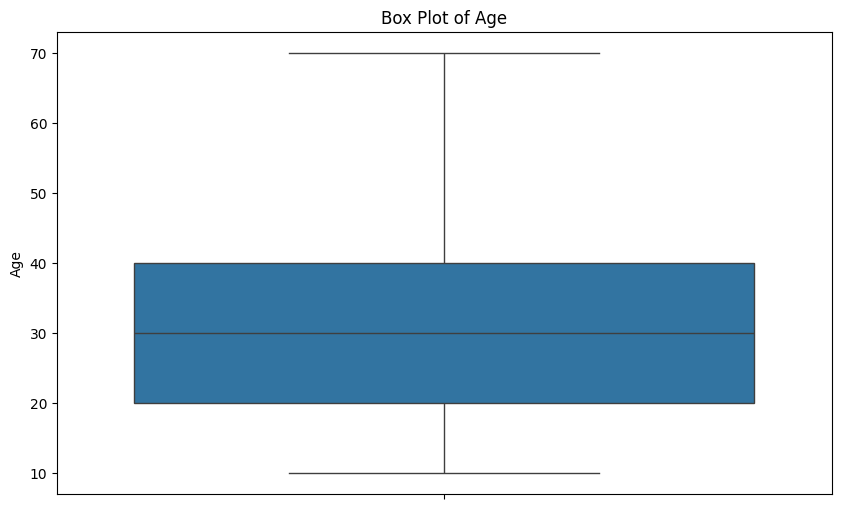

In [41]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

import matplotlib.pyplot as plt

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Age_Numeric'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


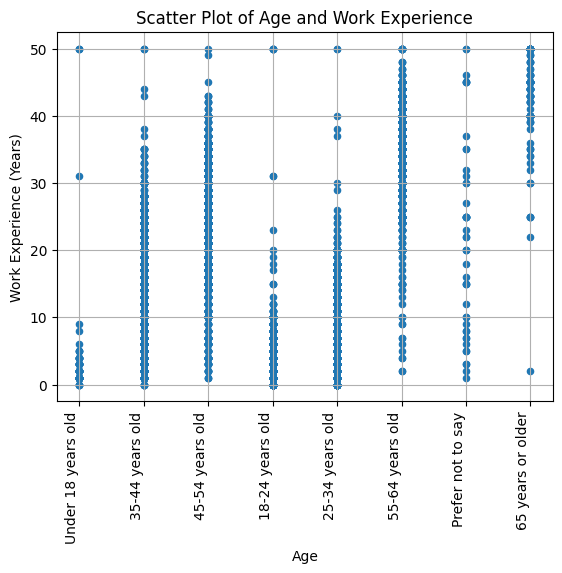

In [22]:
#execute SQL query to retrive data
query = """
SELECT Age, WorkExp FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)

#plot the scatterplot
df.plot.scatter(x='Age', y='WorkExp', title='Scatter Plot of Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.xticks(rotation=90, ha='right')
plt.grid(True)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [42]:
query = """
SELECT TimeSearching, Frustration, Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)
print(df)

      TimeSearching Frustration                 Age
0              None        None  Under 18 years old
1              None        None     35-44 years old
2              None        None     45-54 years old
3              None        None     18-24 years old
4              None        None     18-24 years old
...             ...         ...                 ...
65432          None        None     18-24 years old
65433          None        None     25-34 years old
65434          None        None     25-34 years old
65435          None        None     18-24 years old
65436          None        None     18-24 years old

[65437 rows x 3 columns]


In [20]:
#check missing value
df['TimeSearching'].isna().sum()

np.int64(36526)

In [22]:
df['Frustration'].isna().sum()

np.int64(37186)

In [21]:
df['Age'].isna().sum()

np.int64(0)

In [83]:
#check unique value
print('\nThere are', df['TimeSearching'].nunique(), 'unique TimeSearching values in the survey:')
print(df['TimeSearching'].value_counts())

print('\nThere are', df['Frustration'].nunique(), 'unique Frustration values in the survey:')
print(df['Frustration'].value_counts())

print('\nThere are', df['Age'].nunique(), 'unique Age values in the survey:')
print(df['Age'].value_counts())     


There are 5 unique TimeSearching values in the survey:
TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

There are 954 unique Frustration values in the survey:
Frustration
None of these                                                                                                                                                                                                                                              2364
Amount of technical debt                                                                                                                                                                                                                                   2067
Amount of technical debt;Reliability of tools/systems used in work                                                                              

In [77]:
def count_frustrations(df):
    # 1. Split the semicolon-separated frustrations into lists
    #    and create a new row for each frustration using .explode()
    df['frustration_list'] = df['Frustration'].str.split(';')
    df_exploded = df.explode('frustration_list')
    
    # Clean up whitespace
    df_exploded['frustration_list'] = df_exploded['frustration_list'].str.strip()
    
    # Remove any empty strings that might result from the split (e.g., if there's a trailing semicolon)
    df_exploded = df_exploded[df_exploded['frustration_list'] != '']

    # 2. Group by 'Age', 'TimeSearching', and the individual 'Frustration', then count occurrences
    counts = df_exploded.groupby(['Age', 'TimeSearching', 'frustration_list']).size().reset_index(name='count')

    # 3. Convert the results into a DataFrame suitable for plotting (pivot table)
    #    This creates a matrix where rows are age/timesearching groups and columns are frustrations
    counts_pivot = counts.pivot_table(
        index=['Age', 'TimeSearching'], 
        columns='frustration_list', 
        values='count'
    ).fillna(0) # Fill NaN with 0 for frustrations that didn't occur in a specific group

    return counts_pivot

    # Process and count the frustrations
frustration_counts_df = count_frustrations(df)

# Print the resulting DataFrame
print(frustration_counts_df)

frustration_list                               Amount of technical debt  \
Age                TimeSearching                                          
18-24 years old    15-30 minutes a day                            465.0   
                   30-60 minutes a day                            817.0   
                   60-120 minutes a day                           518.0   
                   Less than 15 minutes a day                      95.0   
                   Over 120 minutes a day                         206.0   
25-34 years old    15-30 minutes a day                           2037.0   
                   30-60 minutes a day                           3076.0   
                   60-120 minutes a day                          1493.0   
                   Less than 15 minutes a day                     557.0   
                   Over 120 minutes a day                         636.0   
35-44 years old    15-30 minutes a day                           1443.0   
                   30-60 

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [12]:
query = """
SELECT DatabaseWantToWorkWith FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)
print(df)

           DatabaseWantToWorkWith
0                            None
1                      PostgreSQL
2      Firebase Realtime Database
3        MongoDB;MySQL;PostgreSQL
4               PostgreSQL;SQLite
...                           ...
65432                        None
65433                        None
65434                        None
65435           PostgreSQL;SQLite
65436    MongoDB;MySQL;PostgreSQL

[65437 rows x 1 columns]


In [80]:
#check unique value
print('\nThere are', df['DatabaseWantToWorkWith'].nunique(), 'unique DatabaseWantToWorkWith values in the survey:')
print(df['DatabaseWantToWorkWith'].value_counts())


There are 8478 unique DatabaseWantToWorkWith values in the survey:
DatabaseWantToWorkWith
PostgreSQL                                                                 3738
PostgreSQL;SQLite                                                          1533
SQLite                                                                     1476
Microsoft SQL Server                                                       1431
MySQL                                                                      1139
                                                                           ... 
Clickhouse;MariaDB;MySQL;PostgreSQL;Redis                                     1
MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite;TiDB               1
DuckDB;Elasticsearch;MongoDB;PostgreSQL                                       1
H2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL;SQLite                        1
BigQuery;Cassandra;Firebase Realtime Database;PostgreSQL;Redis;Supabase       1
Name: count, Length: 8478, dt

                      Database  Count
0                   PostgreSQL  24005
1   Firebase Realtime Database   2536
2                      MongoDB  10982
3                        MySQL  12269
4                       SQLite  13489
5              Cloud Firestore   2119
6                     Supabase   2930
7                        Redis  10847
8                Elasticsearch   6246
9         Microsoft SQL Server   7905
10                      Oracle   2636
11                     MariaDB   5947
12                      Presto    319
13                    Dynamodb   3503
14                   Cosmos DB   1764
15            Microsoft Access    662
16                      DuckDB   1468
17                   Cassandra   2399
18                  Clickhouse   1328
19                          H2   1040
20                       Neo4J   1570
21                 Cockroachdb   1157
22                    Couch DB    620
23                     RavenDB    222
24                    BigQuery   2554
25          

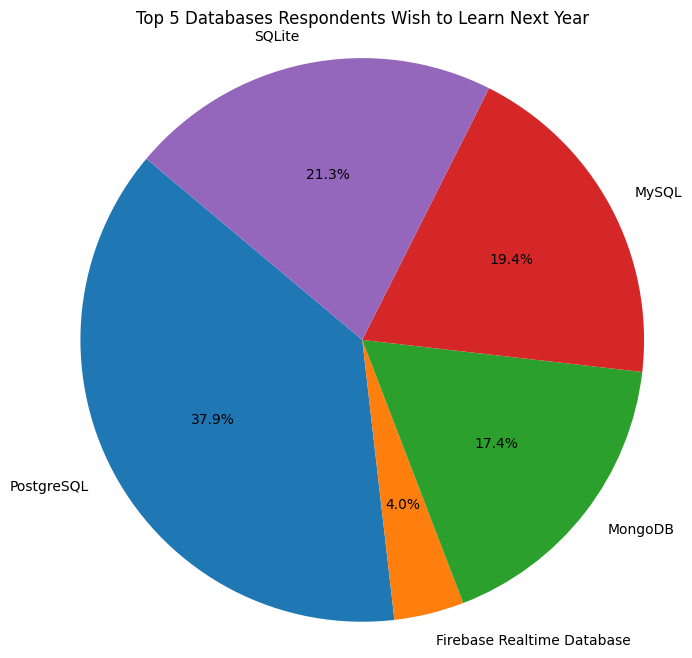

In [15]:
from collections import Counter

#function to count database frequencies
def count_database(series):
    all_database = []
    for entry in series.dropna():
        all_database.extend(entry.split(';'))
    return Counter(all_database)

#get frequencies
database_want_work = count_database(df['DatabaseWantToWorkWith'])

#convert to DataFrames for easier manipulation
df_want = pd.DataFrame(database_want_work.items(), columns=['Database', 'Count'])

print(df_want)

#get top 5 database
top_5_databases = df_want.head(5)

#generate the pie chart
plt.figure(figsize=(8, 8))  # Optional: Adjust the size of the pie chart
plt.pie(top_5_databases['Count'], labels=top_5_databases['Database'], autopct='%1.1f%%', startangle=140)

#add a title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

#ensure the plot is drawn as a circle (equal aspect ratio)
plt.axis('equal')

#display the chart
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [19]:
query = """
SELECT TimeSearching, TimeAnswering, Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)
print(df)

      TimeSearching TimeAnswering                 Age
0              None          None  Under 18 years old
1              None          None     35-44 years old
2              None          None     45-54 years old
3              None          None     18-24 years old
4              None          None     18-24 years old
...             ...           ...                 ...
65432          None          None     18-24 years old
65433          None          None     25-34 years old
65434          None          None     25-34 years old
65435          None          None     18-24 years old
65436          None          None     18-24 years old

[65437 rows x 3 columns]


In [20]:
#check unique value
print('\nThere are', df['TimeSearching'].nunique(), 'unique TimeSearching values in the survey:')
print(df['TimeSearching'].value_counts())

print('\nThere are', df['TimeAnswering'].nunique(), 'unique TimeAnswering values in the survey:')
print(df['TimeAnswering'].value_counts())

print('\nThere are', df['Age'].nunique(), 'unique Age values in the survey:')
print(df['Age'].value_counts())


There are 5 unique TimeSearching values in the survey:
TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64

There are 5 unique TimeAnswering values in the survey:
TimeAnswering
15-30 minutes a day           9341
30-60 minutes a day           8642
Less than 15 minutes a day    5918
60-120 minutes a day          3704
Over 120 minutes a day        1239
Name: count, dtype: int64

There are 8 unique Age values in the survey:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


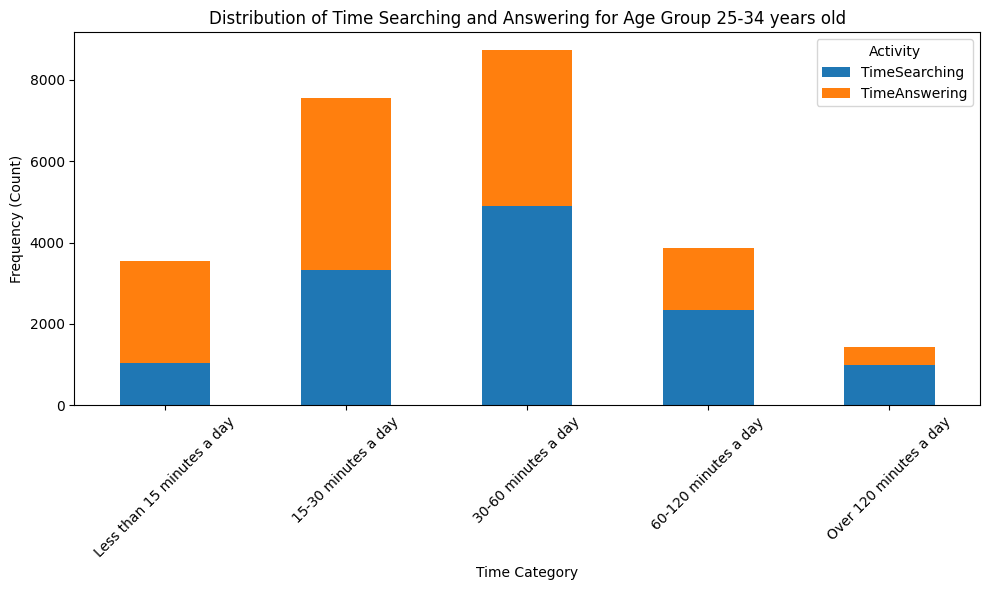

In [23]:
#requested age group is 30 to 35, which falls into the '25-34 years old' category based on the provided age brackets
age_group_filter = '25-34 years old'

#filter the data for the specific age group
df_filtered = df[df['Age'] == age_group_filter].copy()

#process the TimeSearching and TimeAnswering data
#need to count the occurrences of each time category for both 'TimeSearching' and 'TimeAnswering' and combine them into a format suitable for plotting

#define the exact categories and a sorting key for consistent order
time_categories = ['Less than 15 minutes a day', '15-30 minutes a day', '30-60 minutes a day', '60-120 minutes a day', 'Over 120 minutes a day']
category_order = {cat: i for i, cat in enumerate(time_categories)}

#count frequencies for TimeSearching
search_counts = df_filtered['TimeSearching'].value_counts().reindex(time_categories, fill_value=0)
#count frequencies for TimeAnswering
answer_counts = df_filtered['TimeAnswering'].value_counts().reindex(time_categories, fill_value=0)

#create a new DataFrame for plotting
plot_df = pd.DataFrame({'TimeSearching': search_counts, 'TimeAnswering': answer_counts})

#convert counts to percentages for "median" representation 
#with categorical data, a frequency distribution (counts or percentages) is typically used for a stacked bar chart
#we will use counts here as 'median' on a stacked bar chart is not a standard visualization type

#plot the data 
fig, ax = plt.subplots(figsize=(10, 6))
plot_df.plot(kind='bar', stacked=True, ax=ax, rot=45)
ax.set_title(f'Distribution of Time Searching and Answering for Age Group {age_group_filter}')
ax.set_xlabel('Time Category')
ax.set_ylabel('Frequency (Count)')
ax.legend(title='Activity')
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [24]:
query = """
SELECT CompTotal, Age FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)
print(df)

       CompTotal                 Age
0            NaN  Under 18 years old
1            NaN     35-44 years old
2            NaN     45-54 years old
3            NaN     18-24 years old
4            NaN     18-24 years old
...          ...                 ...
65432        NaN     18-24 years old
65433        NaN     25-34 years old
65434        NaN     25-34 years old
65435        NaN     18-24 years old
65436        NaN     18-24 years old

[65437 rows x 2 columns]


In [25]:
#check unique value
print('\nThere are', df['CompTotal'].nunique(), 'unique CompTotal values in the survey:')
print(df['CompTotal'].value_counts())

print('\nThere are', df['Age'].nunique(), 'unique Age values in the survey:')
print(df['Age'].value_counts())


There are 3337 unique CompTotal values in the survey:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64

There are 8 unique Age values in the survey:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


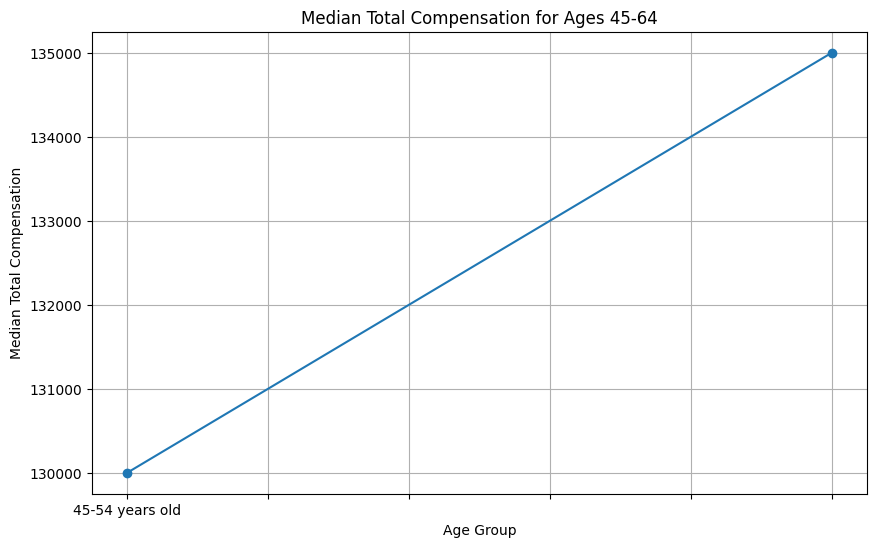

In [26]:
#filter for the relevant age groups: '45-54 years old' and '55-64 years old'
relevant_age_groups = ['45-54 years old', '55-64 years old']
df_filtered = df[df['Age'].isin(relevant_age_groups)].copy()

#clean the data before calculating the median
#drop rows with missing values in 'CompTotal'
df_filtered.dropna(subset=['CompTotal'], inplace=True)

#calculate the median CompTotal for each age group
median_comp_by_age = df_filtered.groupby('Age')['CompTotal'].median().reindex(relevant_age_groups)

#plot the line chart
plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='line', marker='o')

plt.title('Median Total Compensation for Ages 45-64')
plt.xlabel('Age Group')
plt.ylabel('Median Total Compensation')
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [27]:
query = """
SELECT MainBranch FROM main
"""

#load the data into pandas dataframe
df = pd.read_sql_query(query, conn)
print(df)

                           MainBranch
0      I am a developer by profession
1      I am a developer by profession
2      I am a developer by profession
3               I am learning to code
4      I am a developer by profession
...                               ...
65432  I am a developer by profession
65433  I am a developer by profession
65434  I am a developer by profession
65435  I am a developer by profession
65436     I code primarily as a hobby

[65437 rows x 1 columns]


In [28]:
#check unique value
print('\nThere are', df['MainBranch'].nunique(), 'unique MainBranch values in the survey:')
print(df['MainBranch'].value_counts())


There are 5 unique MainBranch values in the survey:
MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64


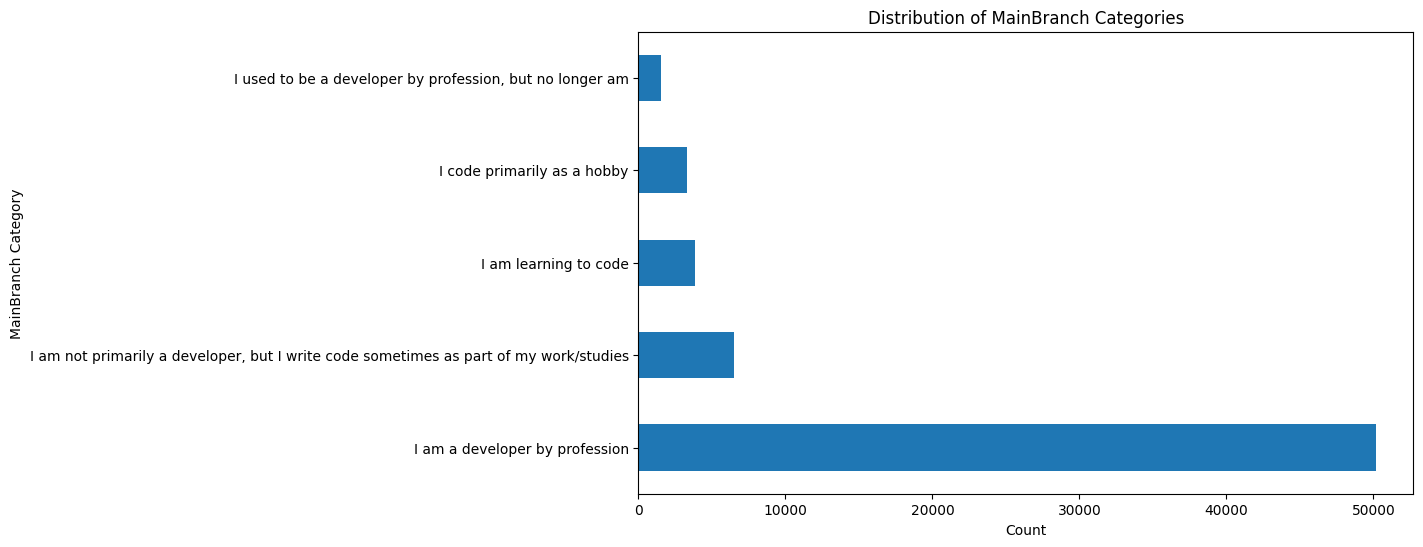

In [29]:
#calculate the frequency of each category in the 'MainBranch' column
branch_counts = df['MainBranch'].value_counts()

#create the horizontal bar chart
plt.figure(figsize=(10, 6))
branch_counts.plot.barh()

plt.title('Distribution of MainBranch Categories')
plt.xlabel('Count')
plt.ylabel('MainBranch Category')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
